Gradient Boosted Machines trained on data subsets

In [31]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os

# code to add to import from optichill folder
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from optichill import bas_filter

%matplotlib inline

# Summer 2017 Training Data

Trained plant with 2017 May, June, and July minute data
Tested data from the rest of the year

In [32]:
lst_train = ['Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv']
lst_test = [
    'Plt1 m 2016-11.csv', 'Plt1 m 2016-11.csv', 'Plt1 m 2017-01.csv',
    'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv',
    'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv',
    'Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv'
]

In [33]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2017-05.csv']
['../../Plt1\\Plt1 m 2017-06.csv']
['../../Plt1\\Plt1 m 2017-07.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 22179 points and 413 dimensions.
A CDWP3SPD_Alarm was noted and 8012 datapoints were removed from the dataset.
A CDWP4Failed was noted and 8012 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 8017 datapoints were removed from the dataset.
A CDWP5Failed was noted and 8017 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 10398 datapoints were removed from the dataset.
A CH3_CHWSTSP_Alarm was noted and 10398 datapoints were removed from the dataset.
A CH3ALARM was noted and 10457 datapoints were removed from the dataset.
A CH3F was noted and 10457 datapoints were removed from the dataset.
A CH4_CHWSTSP_Alarm was noted and 10457 datapoints were re

(44808, 191)

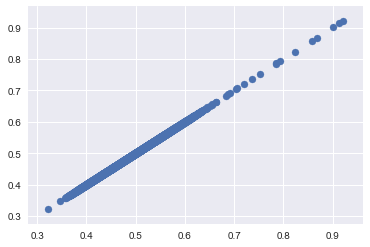

In [34]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

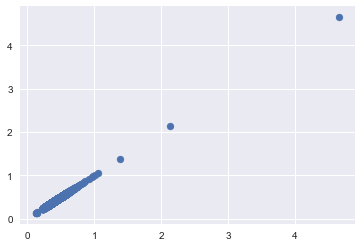

In [35]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [36]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [37]:
model = GradientBoostingRegressor(**params)

In [38]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [39]:
xtrain.shape

(9710, 190)

In [40]:
ytrain.shape

(9710,)

In [41]:
model.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [42]:
ypred = model.predict(xtest)

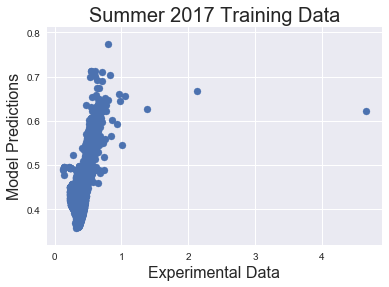

In [43]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Summer 2017 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_summer_plt1_2017.png', bbox_inches='tight')

R2 value

In [44]:
test_score = r2_score(ytest, ypred)
test_score

0.59656163972207876

Feature Importance

In [45]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [46]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [47]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,CH5CHWVLV
2,0.000000,CH5CDWVLV
3,0.000000,CH5AVAIL
4,0.000000,CH5ALARM
5,0.000000,CH5_CHWSTSP_Alarm
6,0.000000,CH4SURGECNT
7,0.000000,CH4SBoolean
8,0.000000,CH4S
9,0.000000,CH4PctLoad


In [48]:
df_feats.to_csv('Feat_imp_summer_test_plt1_2017.csv')